## Python project for analyzing and developing different buying strategies 

In [1]:
import json
from coin_data import get_coin_data, plot_actions, plot_profit
from agents.investors.simple_stop_loss_investor import SimpleStopLossInvestor

In [2]:
json_file_path = "config.json"

# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    config = json.load(json_file)

# print config file
for property, property_info in config.items():
    print(property, ":", property_info["description"])
print("")

# print config properties values
coin = config["coin"]["value"]
print("coin:", coin)

interval = config["interval"]["value"]
print("interval:", interval)

# period = config["period"]["value"]
# print("period:", period)

portfolio_size = config["portfolio_size"]["value"]
print("portfolio_size:", portfolio_size)

coin : An uppercase string code representation of a particular trading pair or instrument. This is usually written as BaseCurrency/QuoteCurrency with a slash as in BTC/USD, LTC/CNY or ETH/EUR, etc. Symbols are used to reference markets within the ccxt library.
interval : Interval between each ticker data point.
period : Period of time that specifies the time interval to be used when fetching data: [period, currentTime]. Possible values are: [d, mo, y, max]
portfolio_size : Initial amount of money (USD) to be used by the trading agent.
DCA_interval : Interval between each DCA (Dollar Cost Averaging) investment (as value * ticker intervals).
BB_window : Window size for the Bollinger Bands indicator.
BB_std : Standard deviation for the Bollinger Bands indicator.

coin: BTC/USDT
interval: 1h
portfolio_size: 2000


In [3]:
# get coin data
coin_data = get_coin_data(coin, interval)

coin_data

,open,high,low,Close,volume
timestamp,,,,,
2023-08-26 16:00:00,26054.00,26060.00,26004.77,26034.21,1625.43664
2023-08-26 20:00:00,26034.22,26047.62,25988.20,26017.37,1388.27082
2023-08-27 00:00:00,26017.38,26030.55,25966.11,26021.96,1957.15103
2023-08-27 04:00:00,26021.96,26055.54,26021.96,26043.61,1536.05749
2023-08-27 08:00:00,26043.61,26095.60,26033.78,26060.44,2365.95212
...,...,...,...,...,...
2023-11-17 04:00:00,36484.00,36521.44,36145.55,36239.76,5666.70131
2023-11-17 08:00:00,36239.76,36464.00,36121.00,36372.83,4890.88110
2023-11-17 12:00:00,36372.82,36620.00,35861.10,36044.80,8673.98523


DCA_interval: 7
dca_investment_amount: 27.77777777777778


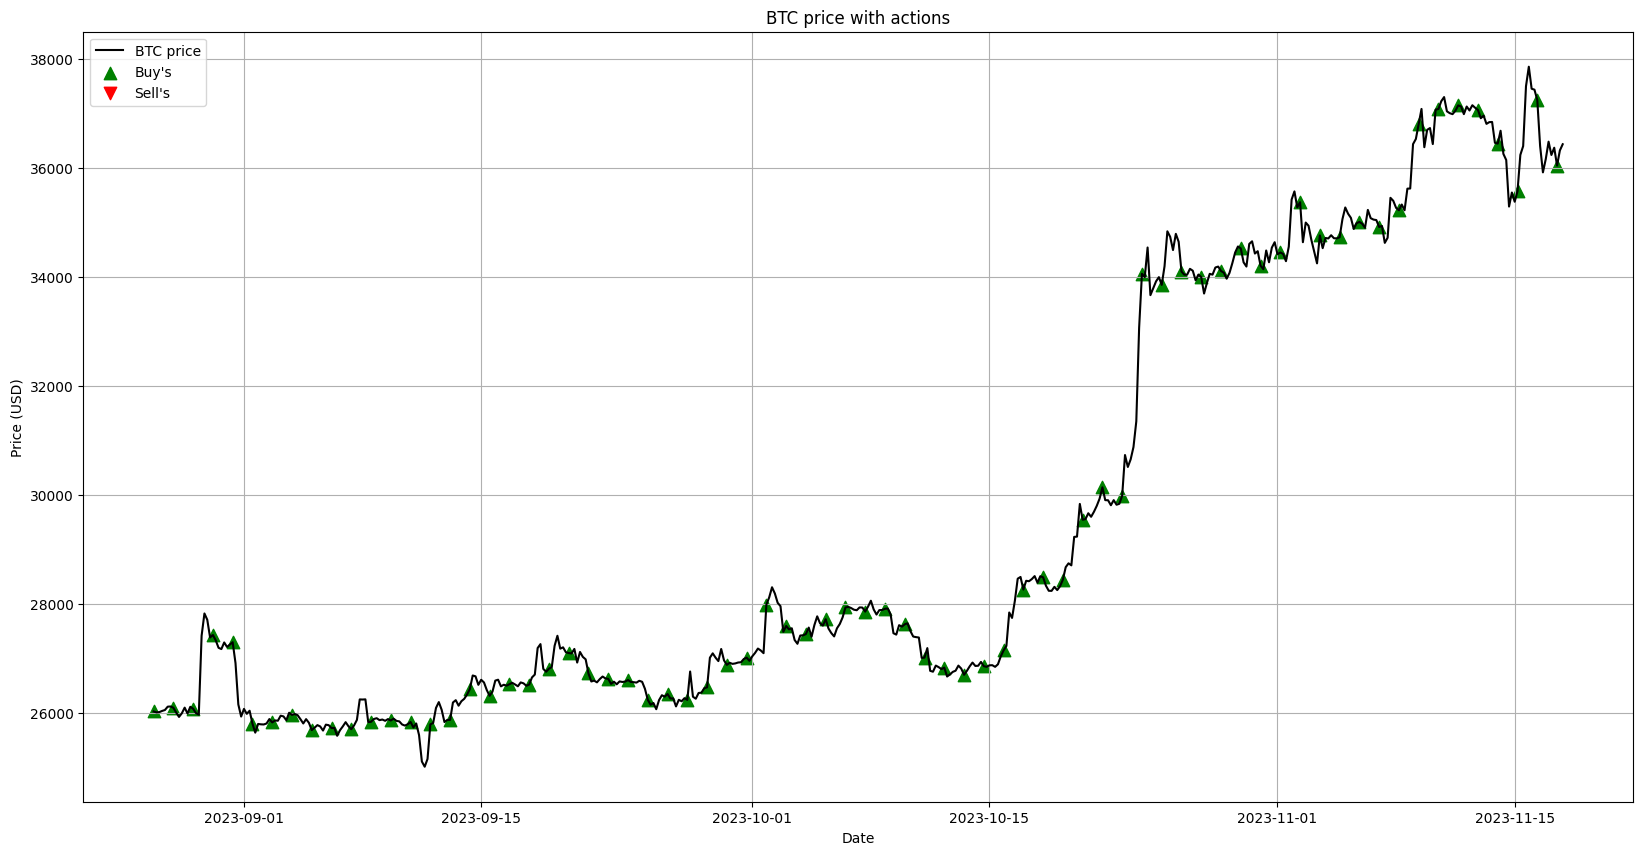

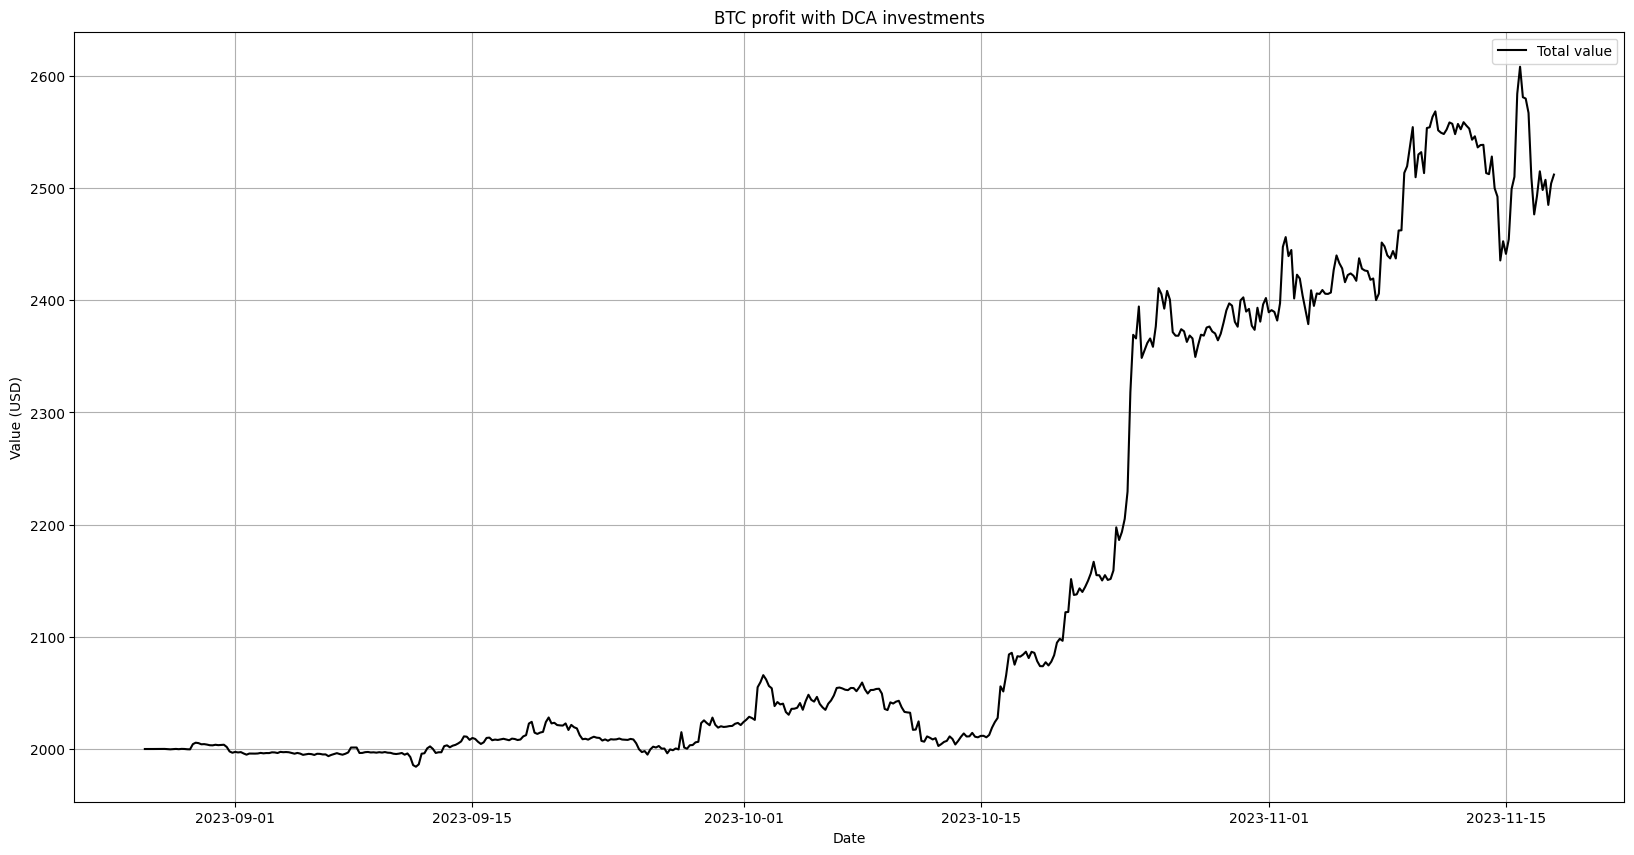

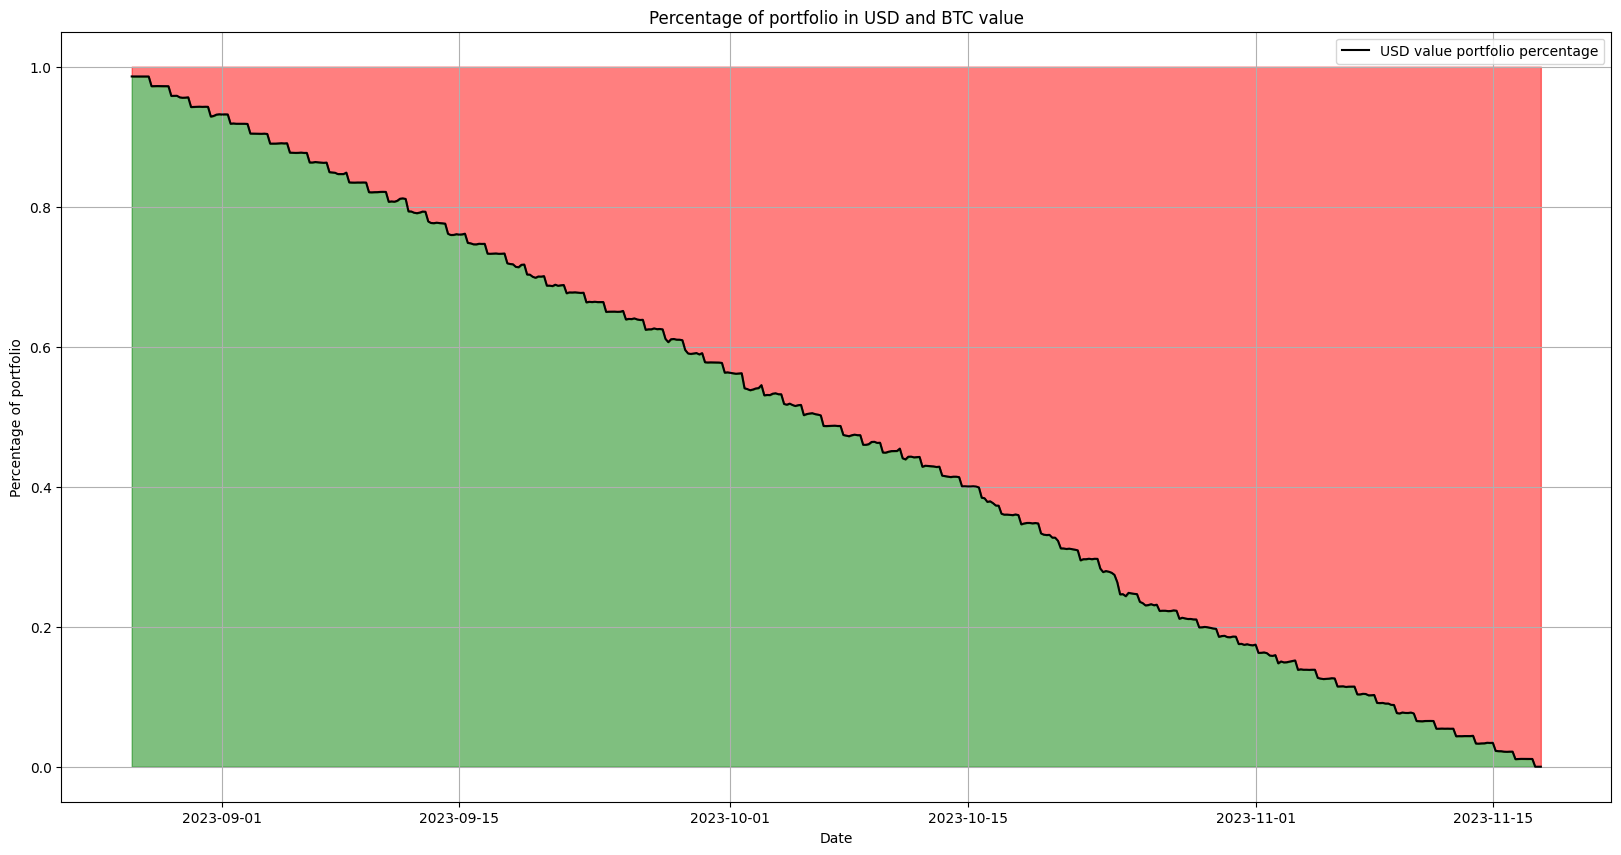

In [4]:
# use DCA as baseline agent
from agents.DCA_agent import DCA_agent
from math import ceil

dca_interval = config["DCA_interval"]["value"]
dca_investment_amount = portfolio_size / ceil(len(coin_data) / dca_interval)

print("DCA_interval:", dca_interval)
print("dca_investment_amount:", dca_investment_amount)

dca_agent = DCA_agent(dca_interval, dca_investment_amount)

dca_actions = dca_agent.act(coin_data)
dca_investment = dca_agent.get_investments(coin_data)

# plot DCA actions
plot_actions(coin_data, dca_actions, "BTC")
plot_profit(coin_data, dca_investment, "BTC", "DCA")

bb_window: 20
bb_std: 2


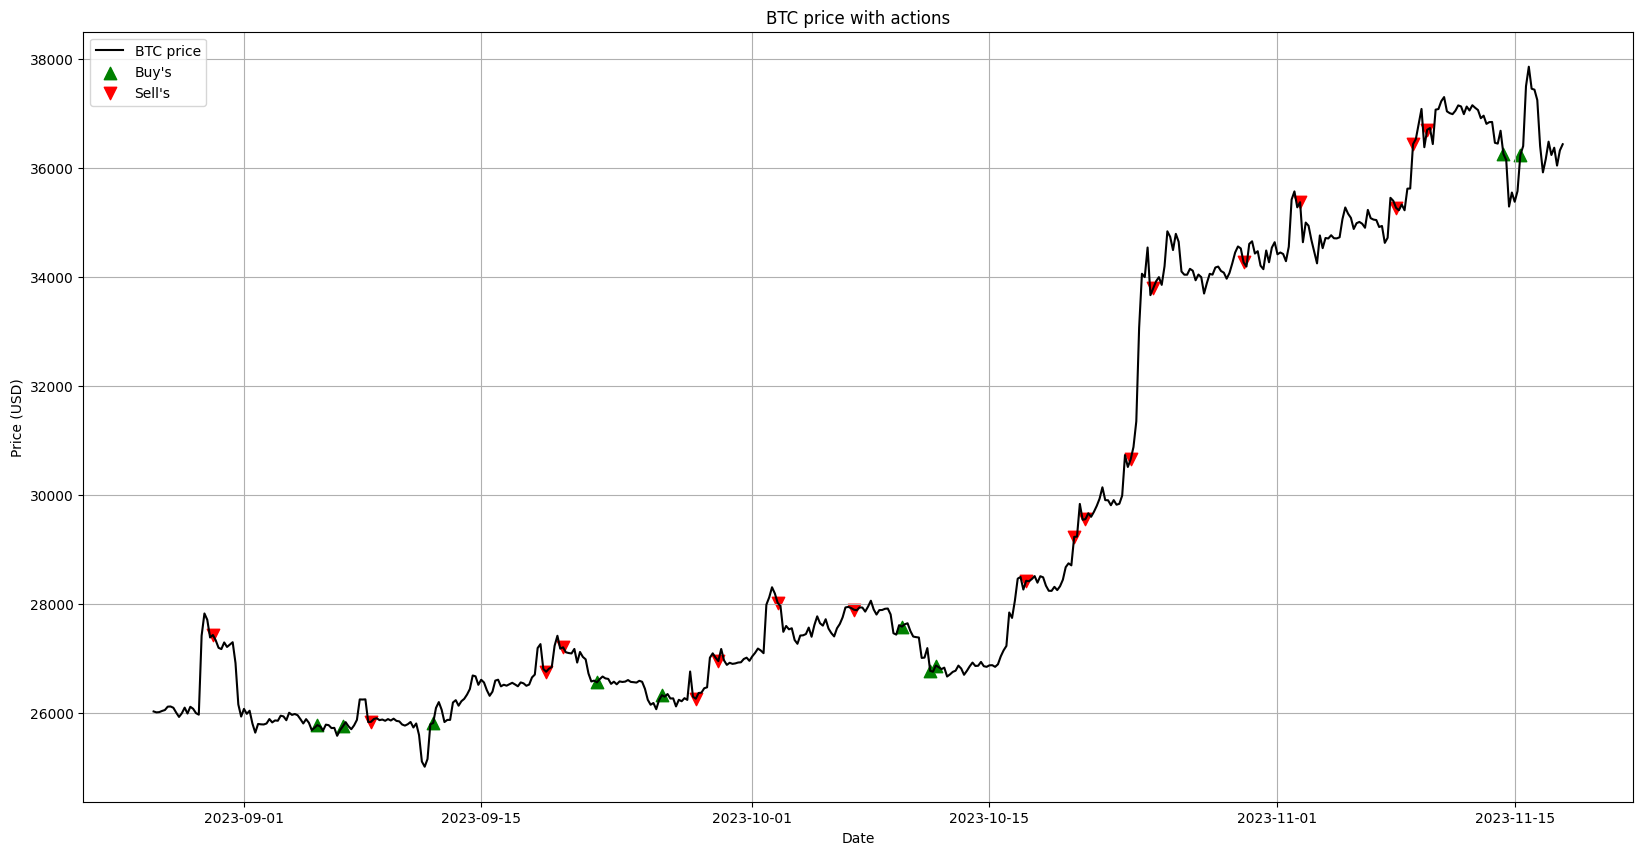

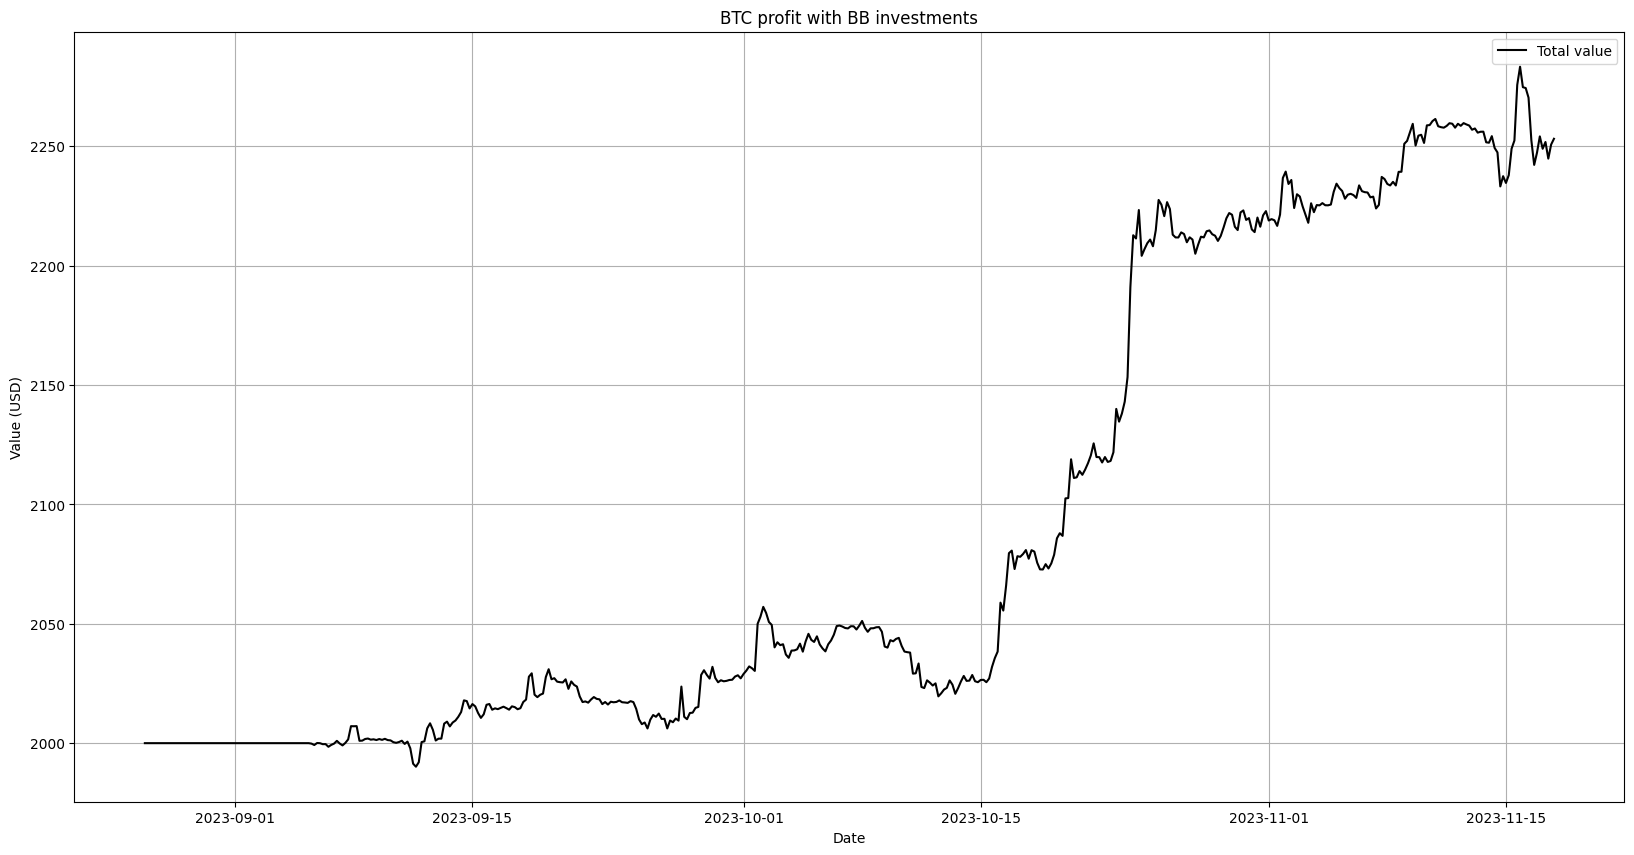

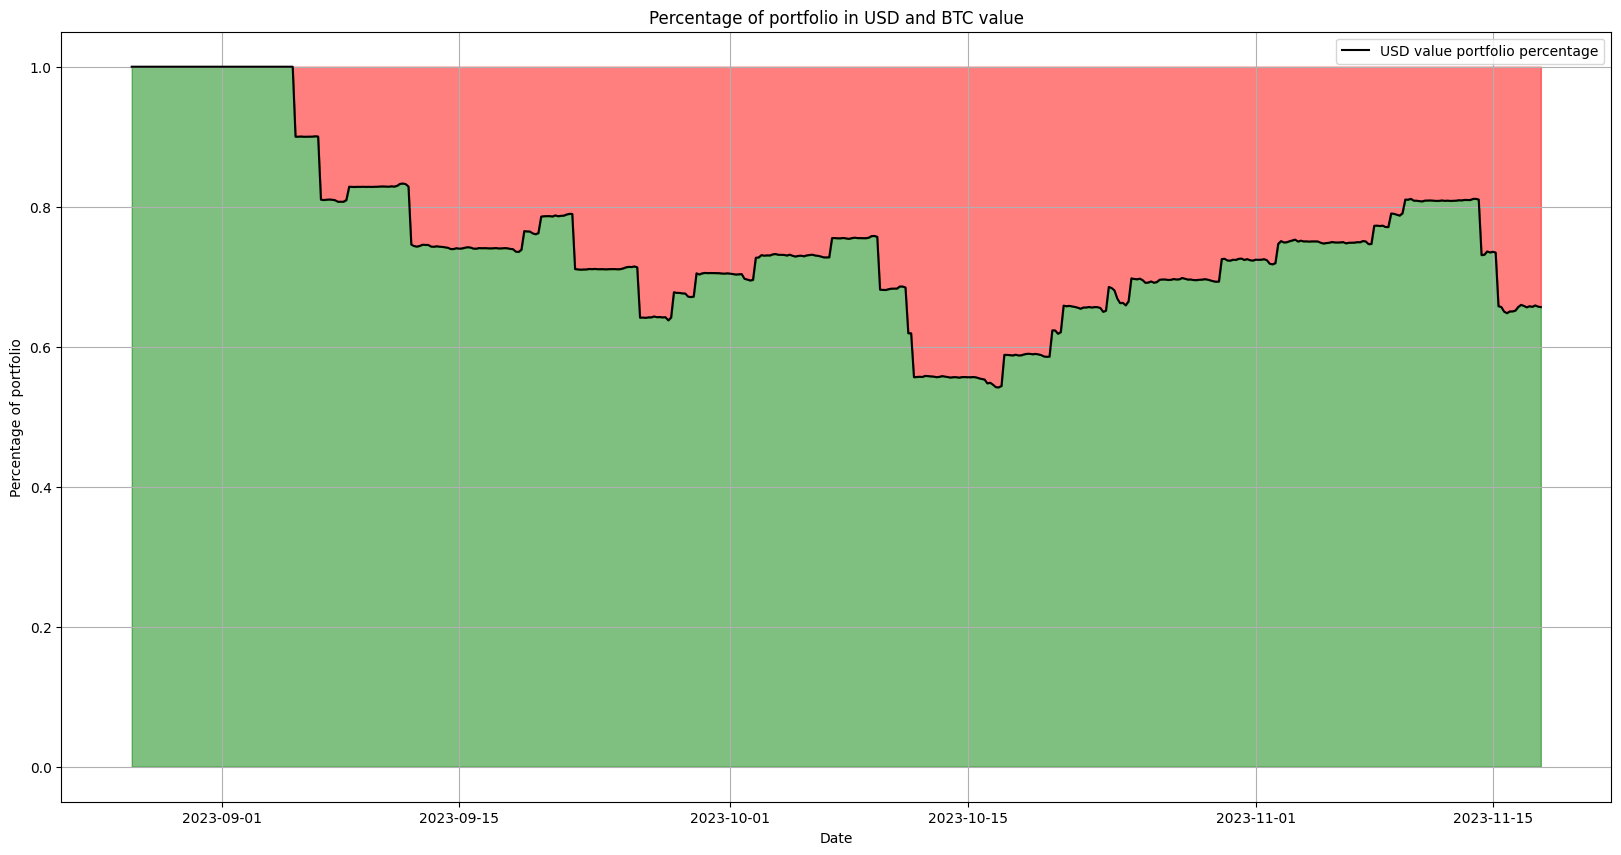

In [5]:
# BB agent
from agents.BB_agent import BB_agent

# bb_window = config["BB_window"]["value"]
# bb_std = config["BB_std"]["value"]

bb_window = 20
bb_std = 2

print("bb_window:", bb_window)
print("bb_std:", bb_std)

# TODO: use BO to find parameters that maximize returns
bb_agent = BB_agent(bb_window, bb_std)
bb_actions = bb_agent.act(coin_data)

# TODO: strat
# first, figure out if thats legal
# - buy *long* position when BUY signal, with take-profit at 1.1% or something
# - buy *short* position when SELL signal, with take-profit at 1.1% or something

stop_loss = 0.05
portfolio_allocation = 0.1
assets_allocation = 0.1

# TODO: fix
bb_investments = SimpleStopLossInvestor(portfolio_size, stop_loss, portfolio_allocation, assets_allocation).get_investments(coin_data, bb_actions)

# plot BB actions
plot_actions(coin_data, bb_actions, "BTC")
plot_profit(coin_data, bb_investments, "BTC", "BB")

macd_fast: 12
macd_slow: 26
macd_signal: 9


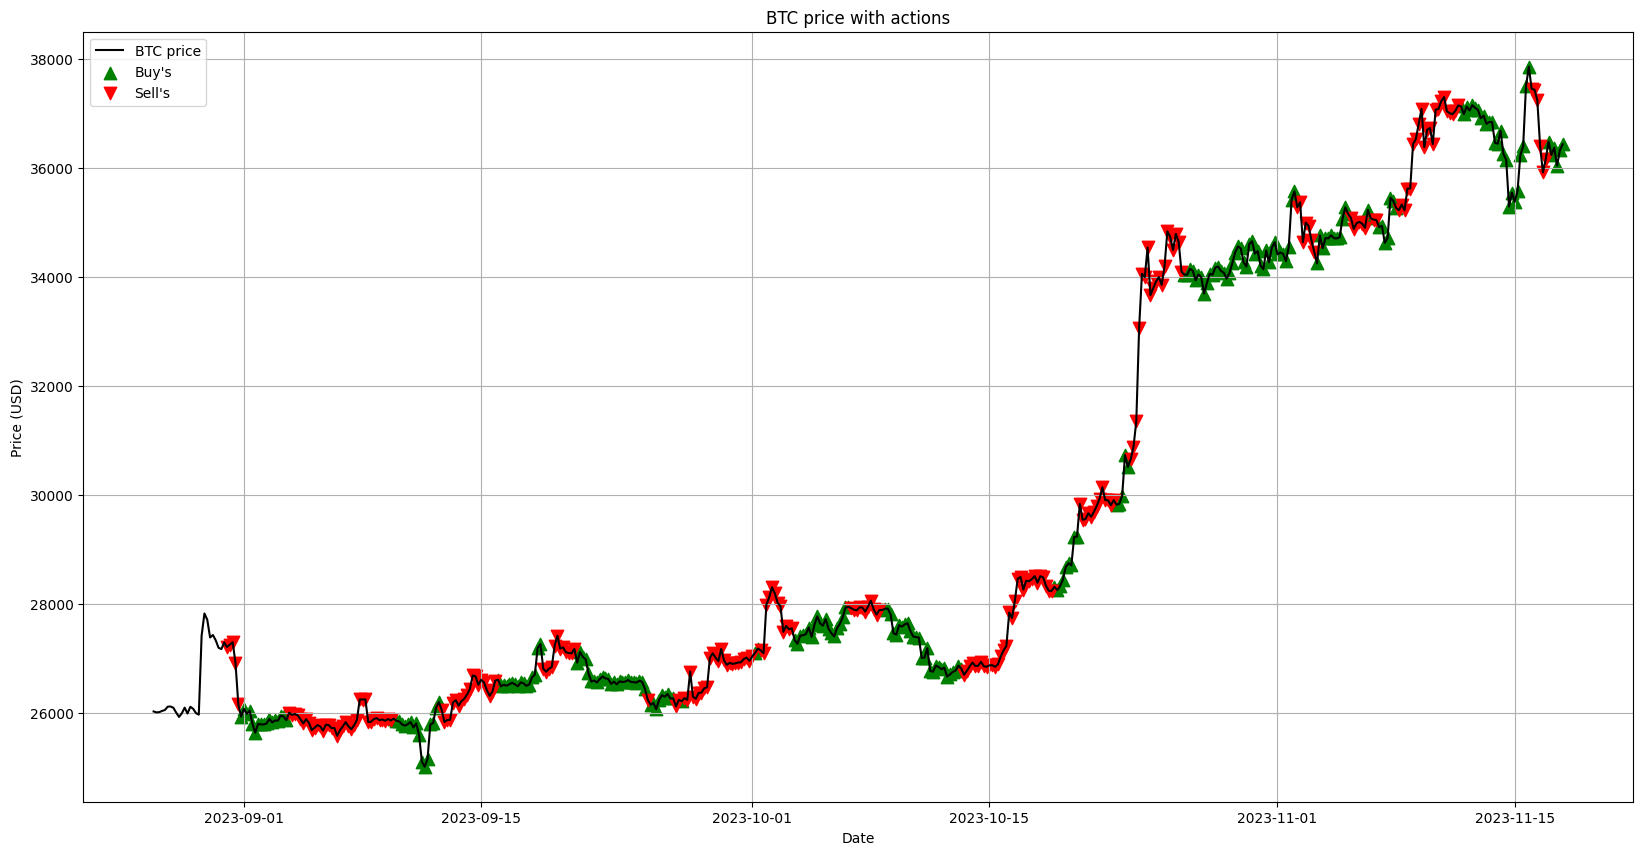

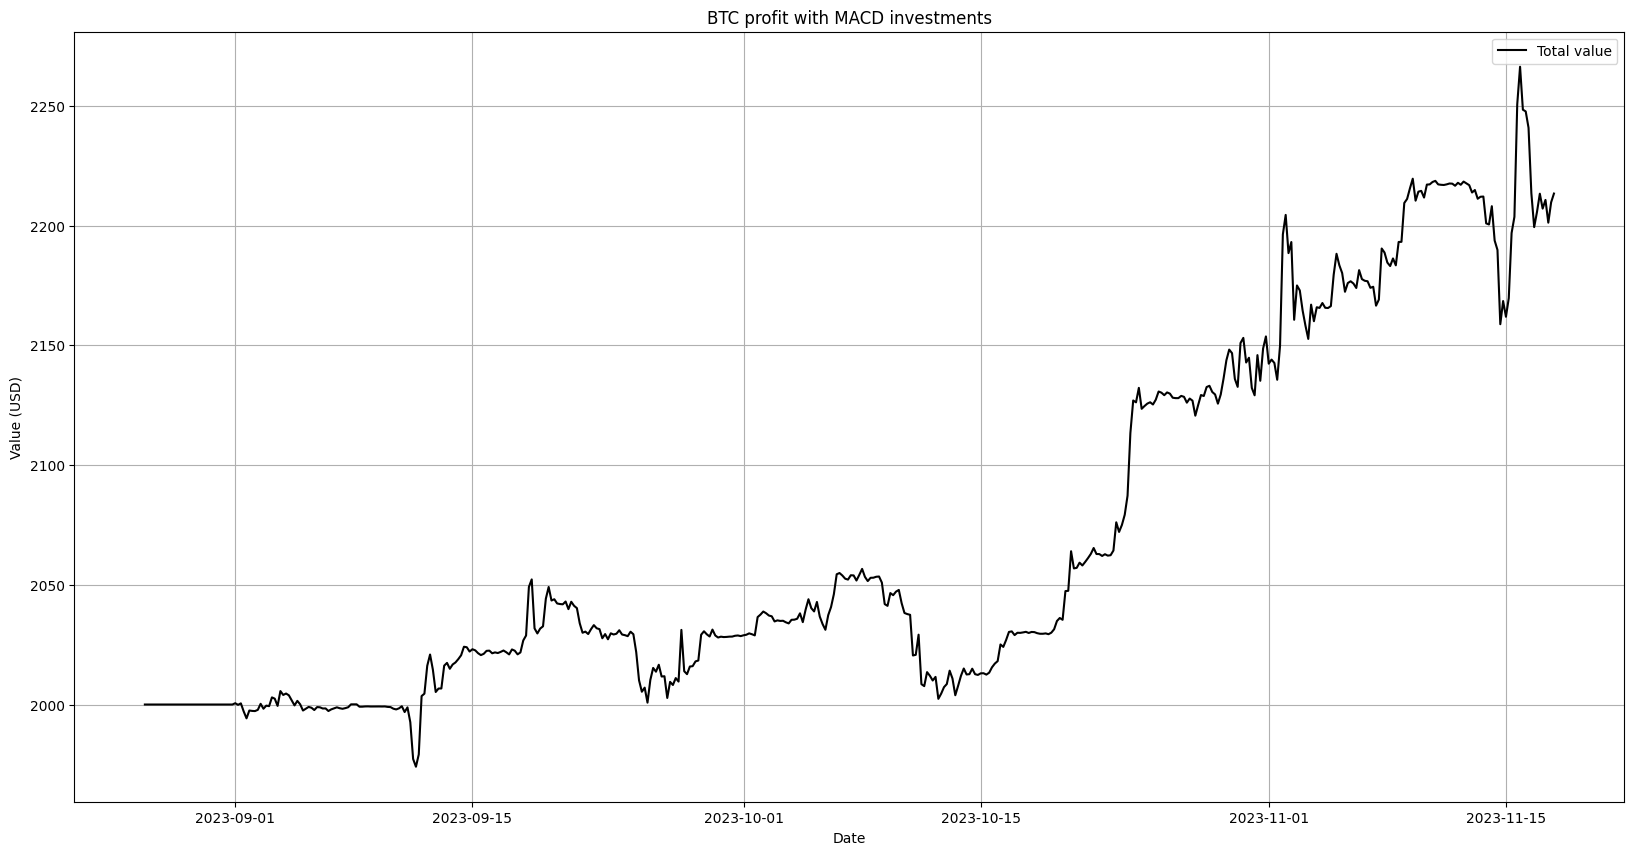

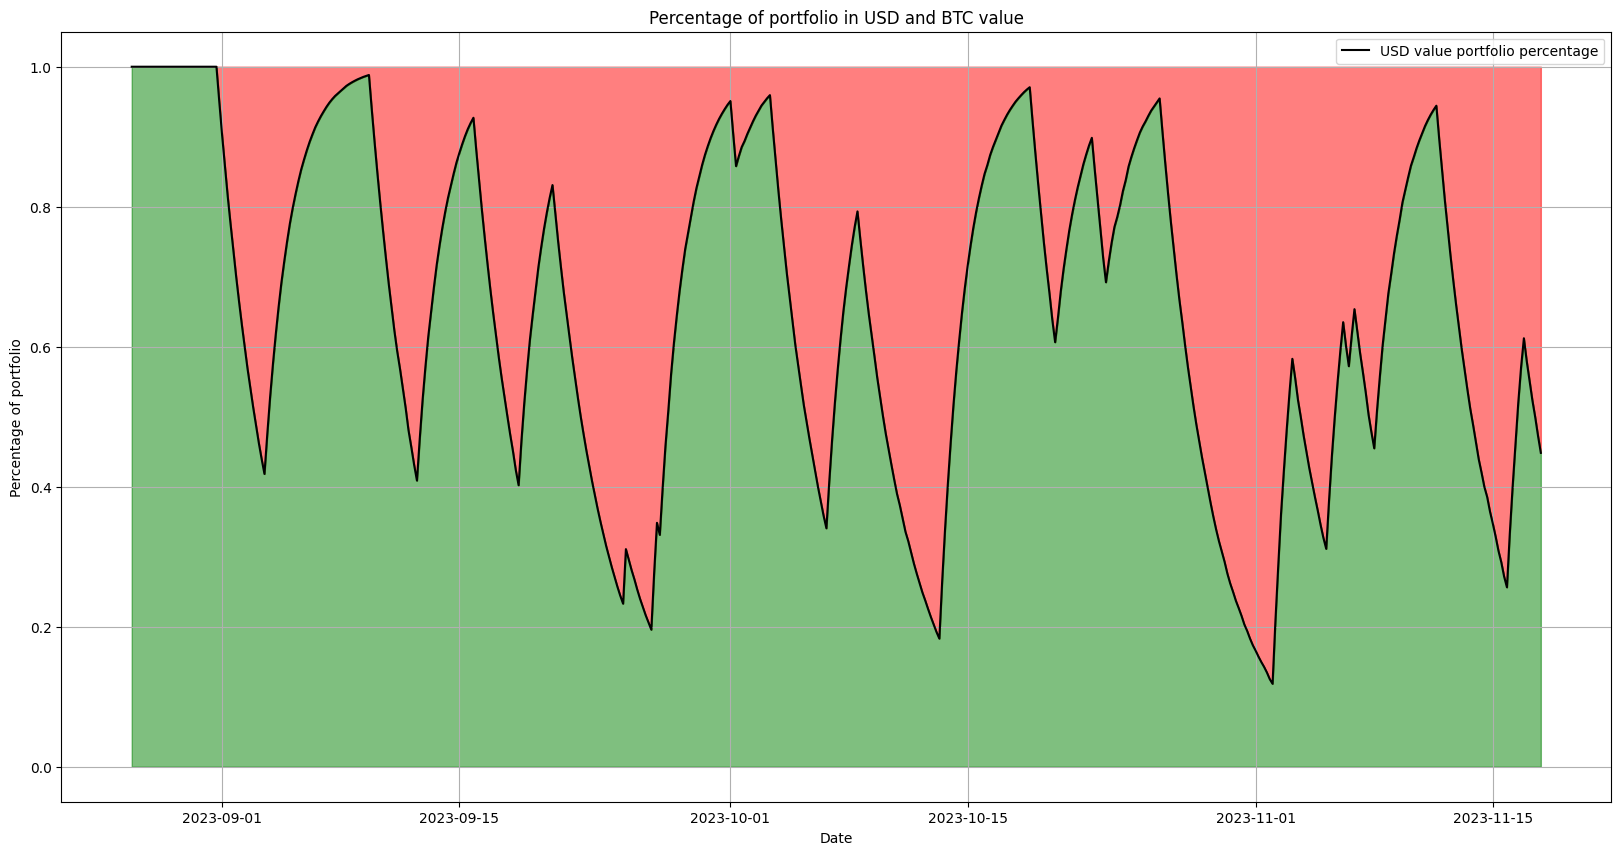

In [6]:
# implement MACD agent
from agents.MACD_agent import MACD_agent

# macd_fast = config["MACD_fast"]["value"]
# macd_slow = config["MACD_slow"]["value"]
# macd_signal = config["MACD_signal"]["value"]

macd_fast = 12
macd_slow = 26
macd_signal = 9

print("macd_fast:", macd_fast)
print("macd_slow:", macd_slow)
print("macd_signal:", macd_signal)

stop_loss = 0.1
portfolio_allocation = 0.05
assets_allocation = 0.1

macd_agent = MACD_agent(macd_fast, macd_slow, macd_signal)
macd_actions = macd_agent.act(coin_data)

macd_investments = SimpleStopLossInvestor(portfolio_size, stop_loss, portfolio_allocation, assets_allocation).get_investments(coin_data, macd_actions)

# plot MACD actions
plot_actions(coin_data, macd_actions, "BTC")
plot_profit(coin_data, macd_investments, "BTC", "MACD")